In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
def f1(r, x1, x2, Lambda):
 return x2

def f2(r, x1, x2, Lambda):
 return -x2/r - x1*Lambda**2

def unPasRungeKutta_acoplado(r, x1, x2, dr, Lambda):
 dx11 = dr*f1(r,x1,x2, Lambda)
 dx12 = dr*f2(r,x1,x2, Lambda)
 dx21 = dr*f1(r+dr/2, x1+dx11/2, x2+dx12/2, Lambda)
 dx22 = dr*f2(r+dr/2, x1+dx11/2, x2+dx12/2, Lambda)
 dx31 = dr*f1(r+dr/2, x1+dx21/2, x2+dx22/2, Lambda)
 dx32 = dr*f2(r+dr/2, x1+dx21/2, x2+dx22/2, Lambda)
 dx41 = dr*f1(r+dr, x1+dx31, x2+dx32, Lambda)
 dx42 = dr*f2(r+dr, x1+dx31, x2+dx32, Lambda)
 x1 += (dx11+2*(dx21+dx31)+dx41)/6
 x2 += (dx12+2*(dx22+dx32)+dx42)/6
 r+=dr
 return r, x1, x2

def calculeR(x,rmax):
  #Se definen los parametros y las condiciones iniciales del programa
  Lambda=x
  x1 = 1
  x2 = 0
  dr = 0.001
  r = 0.01
  tamaño = int(rmax/dr)

  #Se corre el metodo RK4 y se guardan los datos
  datos=np.zeros((tamaño,3))

  for ii in np.arange(tamaño):
      r, x1, x2 = unPasRungeKutta_acoplado(r,x1,x2,dr,Lambda)
      datos[ii, 0]=r
      datos[ii, 1]=x1
      datos[ii, 2]=x2

  rho = datos[ : ,0]
  R = datos[ : , 1]
  return rho, R


def calculeRe1(x):
  #Se definen los parametros y las condiciones iniciales del programa
  Lambda=x
  x1 = 1
  x2 = 0
  dr = 0.001
  r = 0.01
  rmax = 10
  tamaño = int(rmax/dr)

  #Se corre el metodo RK4 y se guardan los datos
  datos=np.zeros((tamaño,3))

  for ii in np.arange(tamaño):
      r, x1, x2 = unPasRungeKutta_acoplado(r,x1,x2,dr, Lambda)
      datos[ii, 0]=r
      datos[ii, 1]=x1
      datos[ii, 2]=x2
  return datos[ 989, 1]


def calculeRdeLambda(x):
  if type(x)==np.ndarray:
    posiciones=np.zeros(len(x))
    cont=0
    for i in x:
      posiciones[cont]=calculeRe1(i)
      cont+=1
    return posiciones
  else:
    return calculeRe1(x)


def CerosPorBiseccion(a, b, f):
  ERR = 1e-6
  fa= f(a)
  while(b-a>ERR):
    m = (a + b) / 2
    fm = f(m)
    if(fa * fm > 0):
      a = m
      fa = fm
    else:
      b = m
  return (a+b)/2

In [6]:
3//2

1

# PUNTO (A)

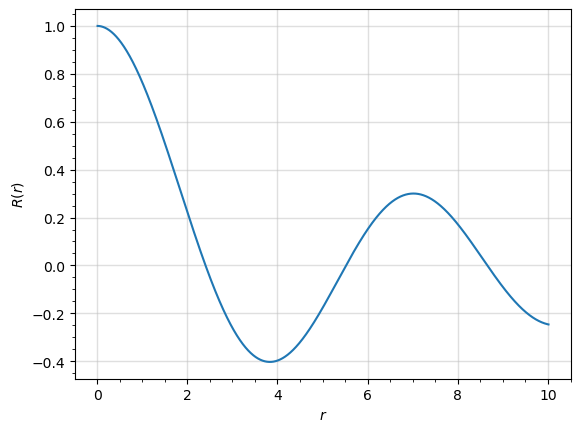

In [39]:
#Se calcula los valores de R(r) con un lambda=1
rho , R = calculeR(1,10)

plt.plot(rho, R)
plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.xlabel(r"$r$")
plt.ylabel(r"$R(r)$")
plt.minorticks_on()
plt.show()

# PUNTO (B)

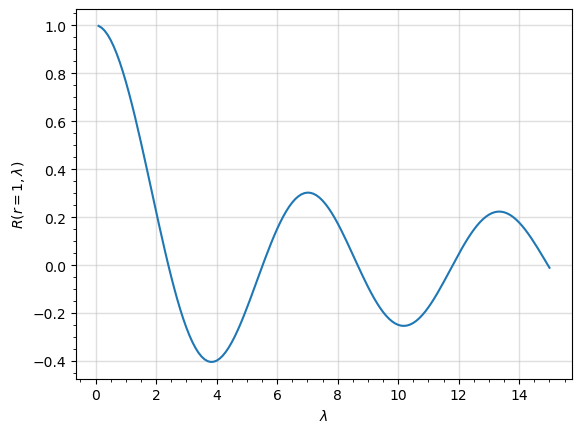

In [5]:
#Se calcula el valor de R en funcion de los lambdas tomando r=1
LAMBDAS=np.arange(0.1,15+0.1,0.1)
R=calculeRdeLambda(LAMBDAS)


plt.plot(LAMBDAS,R)
plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.ylabel(r"$R(r=1,\lambda)$")
plt.xlabel(r"$\lambda$")
plt.minorticks_on()
plt.show()



In [6]:
#Se hallan valores de \lambda para los que |R(1,\lambda)|<0.02 para estimar la posición de los ceros observados en la gráfica

ceros = LAMBDAS[abs(R) < 0.02]
print(ceros)

[ 2.4  5.5  8.6  8.7 11.8 14.9 15. ]


# PUNTO(C)

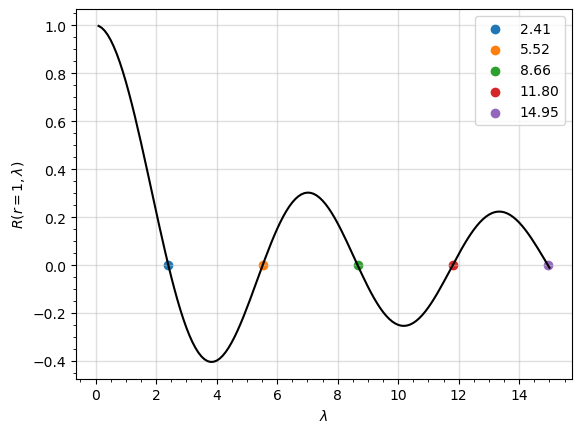

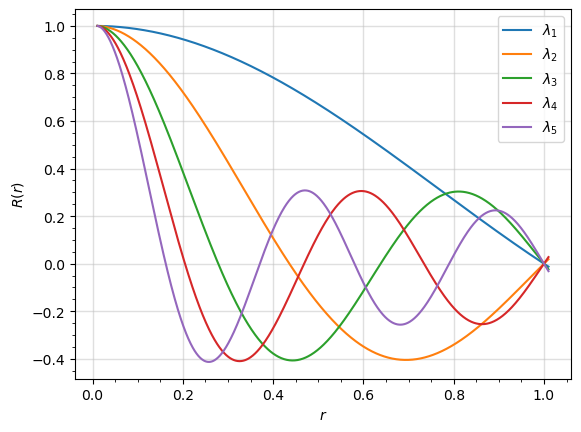

In [7]:
cero_1=CerosPorBiseccion(1,4, calculeRdeLambda)
cero_2=CerosPorBiseccion(4,8, calculeRdeLambda)
cero_3=CerosPorBiseccion(8,10, calculeRdeLambda)
cero_4=CerosPorBiseccion(10,12, calculeRdeLambda)
cero_5=CerosPorBiseccion(12,15, calculeRdeLambda)

plt.plot(LAMBDAS,R, color="black")
plt.scatter(cero_1,calculeRdeLambda(cero_1), label=f"{cero_1:.2f}")
plt.scatter(cero_2,calculeRdeLambda(cero_2), label=f"{cero_2:.2f}")
plt.scatter(cero_3,calculeRdeLambda(cero_3), label=f"{cero_3:.2f}")
plt.scatter(cero_4,calculeRdeLambda(cero_4), label=f"{cero_4:.2f}")
plt.scatter(cero_5,calculeRdeLambda(cero_5), label=f"{cero_5:.2f}")
plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.ylabel(r"$R(r=1,\lambda)$")
plt.xlabel(r"$\lambda$")
plt.minorticks_on()
plt.legend()
plt.show()


rho1 , R1 = calculeR(cero_1,1.0)
rho2 , R2 = calculeR(cero_2,1.0)
rho3 , R3 = calculeR(cero_3,1.0)
rho4 , R4 = calculeR(cero_4,1.0)
rho5 , R5 = calculeR(cero_5,1.0)

plt.plot(rho1, R1, label=r"$\lambda _{1}$")
plt.plot(rho2, R2, label=r"$\lambda _{2}$")
plt.plot(rho3, R3, label=r"$\lambda _{3}$")
plt.plot(rho4, R4, label=r"$\lambda _{4}$")
plt.plot(rho5, R5, label=r"$\lambda _{5}$")
plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.xlabel(r"$r$")
plt.ylabel(r"$R(r)$")
plt.minorticks_on()
plt.legend()
plt.show()

# Punto(D)

In [8]:
points = np.linspace(0, 15, 1000)
Bessel = sp.special.j0(points)

z1 = CerosPorBiseccion(1,4, sp.special.j0)
z2 = CerosPorBiseccion(4,8, sp.special.j0)
z3 = CerosPorBiseccion(8,10, sp.special.j0)
z4 = CerosPorBiseccion(10,12, sp.special.j0)
z5 = CerosPorBiseccion(12,15, sp.special.j0)

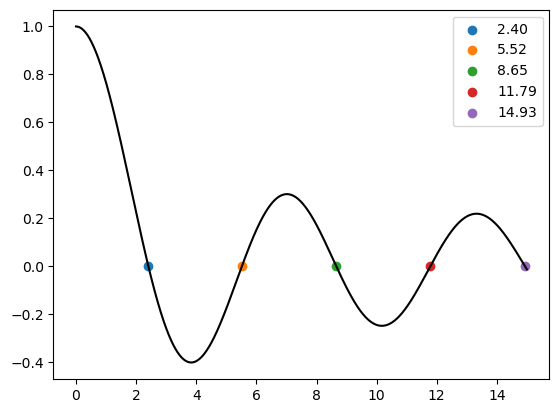

In [9]:
plt.scatter(z1, 0, label=f"{z1:.2f}")
plt.scatter(z2, 0, label=f"{z2:.2f}")
plt.scatter(z3, 0, label=f"{z3:.2f}")
plt.scatter(z4, 0, label=f"{z4:.2f}")
plt.scatter(z5, 0, label=f"{z5:.2f}")
plt.plot(points, Bessel,'k')

plt.legend()
plt.show()

In [12]:
Bessel_1 = sp.special.j0( z1*points)
Bessel_2 = sp.special.j0( z2*points)
Bessel_3 = sp.special.j0( z3*points)
Bessel_4 = sp.special.j0( z4*points)
Bessel_5 = sp.special.j0( z5*points)

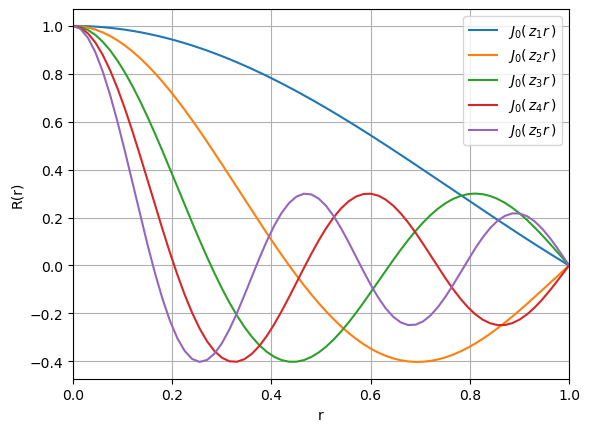

In [14]:
plt.plot(points, Bessel_1, label = r"$J_0(\,z_1 r\,)$")
plt.plot(points, Bessel_2, label = r"$J_0(\,z_2 r\,)$")
plt.plot(points, Bessel_3, label = r"$J_0(\,z_3 r\,)$")
plt.plot(points, Bessel_4, label = r"$J_0(\,z_4 r\,)$")
plt.plot(points, Bessel_5, label = r"$J_0(\,z_5 r\,)$")

#plt.title('R en función de r según las funciones de Bessel')
plt.xlabel("r")
plt.ylabel('R(r)')
plt.xlim(0, 1)

plt.legend()
plt.grid()
plt.show()